action and state in matrix -> 100 Q-values
- important about SARSA: on-policy (SARSA) & off-policy(Q learning)
- both sarsa and Q-Learning are TD learning algorithms
- Q learning: behaviour policy that shapes your behaviour and another policy. divorce behaviour policy from policy you are updating
- SARSA is always behaving according to behaving policy. Learing: make behaviour greedier and greedier over time.
- Q Learning is the better algorithm because of its convergence guaranty 

- eligibility traces: look at end of lecture for update equation. (dont forget gamma)idea: keep in memory all states you have visited with decaying weight with time. 
- $Q^{\pi}(s,a) = E [ \sum_{t = 0} \gamma^t  r(s_t,a_t) | a_0 = a, s_0 = s ]$ (E = Expectation)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Exercise 8: Reinforcement Learning II

#### Lukas Dippold, Evert de Man

### 1. Good vs. Bad Döner

#### (1)

In [76]:
eps = 0.1
eta = 0.1

def eps_greedy(qv,state, eps):
    if np.random.uniform(0,1) <= eps:
        step = np.random.choice([-1,1], p = [0.5,0.5])
        if step > 0: 
            action = 0
        else: 
            action = 1
    else:
        if qv[1,state] < qv[0,state]:
            step = +1
            action = 0
        else:
            step = -1
            action = 1
    return step,action


class agent():
    def __init__(self):
        #Q values: 2 rows: 0 = up, 1 = down
        self.qv = np.random.uniform(0,9,(2,52))
        #set borders to zero
        self.qv[0,0]= self.qv[1,0] = 0
        self.qv[0,51] =self.qv[1,51]= 0
    
    def trial(self,gamma):
        #random starting point. not in döner location which is at 1 and 50
        self.state = np.random.randint(2,50)
        duration = 0
        
        #the first step
        step,action = eps_greedy(self.qv,self.state,eps)
        newPos = self.state + step
        
        while((self.state!=1)&(self.state!=50)):
            
            step_next = action_next = 0

            #get reward
            if newPos == 50:
                r = 100
                q_target = r
            elif newPos == 1:
                r = 1000
                q_target = r
            else:
                r = -10
                
                #next step
                step_next,action_next = eps_greedy(self.qv,newPos,eps)
                q_next = self.qv[action_next,newPos]
                q_target = r + gamma*q_next
            
            #update Q value
            dQ = eta*(q_target - self.qv[action,self.state])
            self.qv[action,self.state] += dQ

            #set new state
            self.state = newPos
            newPos = self.state + step_next
            action = action_next
            duration += 1
            
        return duration

#### (2)

In [79]:
a = agent()
gamma = 1
trials = 50000
d = []
for i in range(trials):
    d.append(a.trial(gamma))

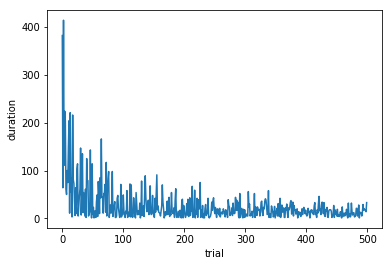

In [91]:
plt.plot(d[:500])
plt.xlabel('trial')
plt.ylabel('duration')
plt.show()

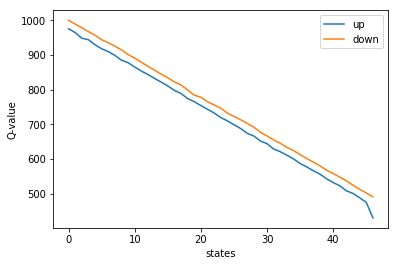

In [86]:
plt.plot(a.qv[0,2:49],label='up')
plt.plot(a.qv[1,2:49],label='down')
plt.xlabel('states')
plt.ylabel('Q-value')
plt.legend()
plt.show()

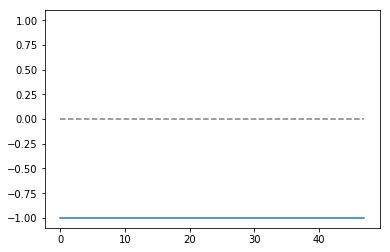

In [104]:
pref = []
for i in range(2,50):
    if (a.qv[0,i] > a.qv[1,i]):
        pref.append(1)
    else:
        pref.append(-1)

plt.plot(pref)
plt.plot(np.zeros(len(pref)),'--',color='gray')
plt.ylim(-1.1,1.1)
plt.show()

- the agent always wants to go down. in less than 100 trials the duration time is under 100 steps per trial. in 10 percent of cases it can go with a 50 percent chance up because of epsilon greedy policy. 
- as gamma is 1, the reward of 1000 is 'directly' propagated through the different states. as we know the true reward, it makes of course sense to go always down to the good döner. 

#### (3)

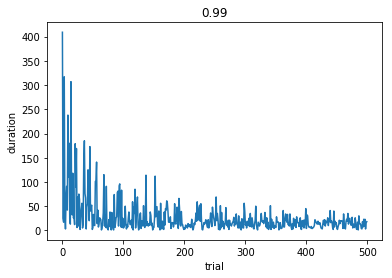

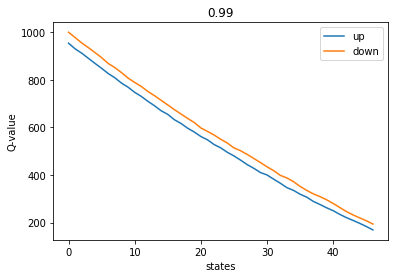

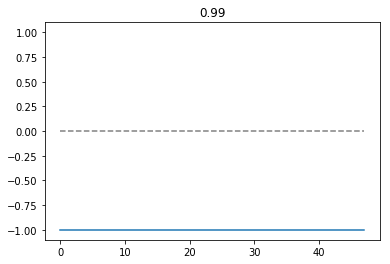

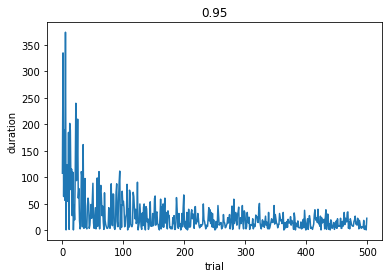

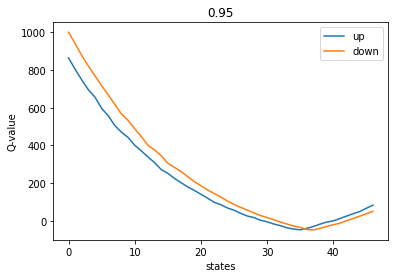

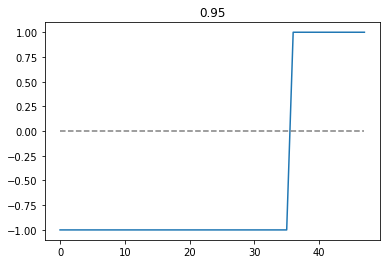

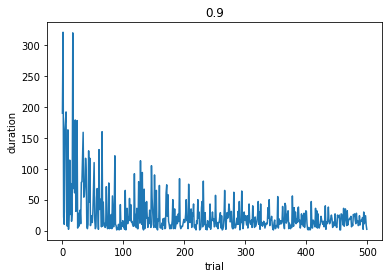

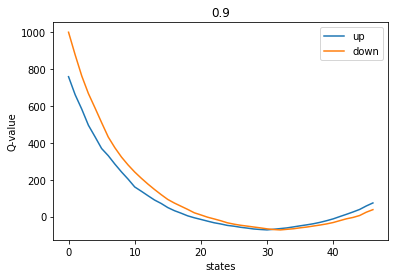

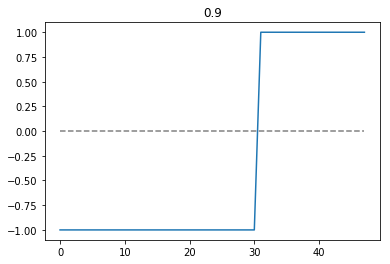

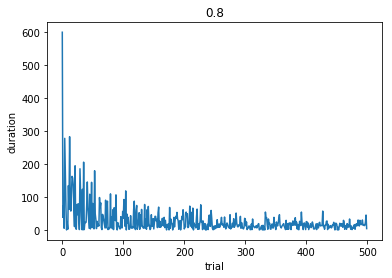

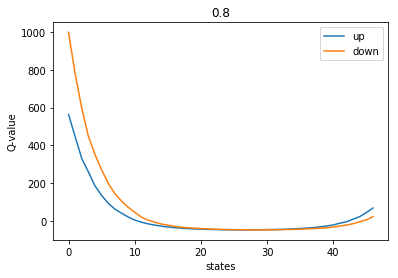

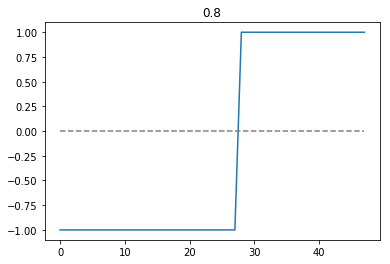

In [110]:
gammas = [0.99,0.95,0.9,0.8]
trials = 50000

for gamma in gammas:   
    a = agent()
    d = []
    for i in range(trials):
        d.append(a.trial(gamma))
    
    plt.title(str(gamma))
    plt.plot(d[:500])
    plt.xlabel('trial')
    plt.ylabel('duration')
    plt.show()
    
    plt.title(str(gamma))
    plt.plot(a.qv[0,2:49],label='up')
    plt.plot(a.qv[1,2:49],label='down')
    plt.xlabel('states')
    plt.ylabel('Q-value')
    plt.legend()
    plt.show()
    
    pref = []
    for i in range(2,50):
        if (a.qv[0,i] > a.qv[1,i]):
            pref.append(1)
        else:
            pref.append(-1)
            
    plt.title(str(gamma))
    plt.plot(pref)
    plt.plot(np.zeros(len(pref)),'--',color='gray')
    plt.ylim(-1.1,1.1)
    plt.show()

- with smaller gamma, the Q values are getting smaller the farer away it is from a döner. The lower gamma is, the more the agent 'forgets' about the reward that is waiting at good döner. it then starts to prefer the nearer bad döner.
- with lower gamma, the Q-value of the next state is getting less relevant for the update of the current Q-value. but that is the way through which the positive reward is propagated through the states. 